In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
#img = 256-plt.imread('data/eyeofthetiger.jpg')
img = 256-plt.imread('data/ring.png')[:,:,0]
img_N_half = int(img.shape[0]/2)

M = 2*img_N_half
x = np.linspace(-0.5,0.5,M,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],-x2.ravel()[:]]).transpose()
mu = img[:]
#plt.imshow(256-mu.reshape(M,M))

nfft2d = nfft.NFFT2D(M**2,2*img_N_half,2*img_N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/M**2
nfft2d.adjoint()
mu_hat = np.zeros([2*img_N_half,2*img_N_half],dtype=complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[img_N_half,img_N_half]

In [3]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
m = 96
t = np.linspace(0,2*np.pi,m,endpoint=False)
points.coords = np.zeros([m,2])
points.coords[:,1] = 0.2*np.cos(t)
points.coords[:,0] = 0.2*np.sin(t)
points_new = lorm.manif.ManifoldPointArray(e2)
L = 0.97*np.sqrt(2)*4

In [5]:
for k in range(1,2):
    N_half = 4*int(L/0.97)
    N=2*N_half
    m = points.coords.shape[0]
    energy = disc.energy_curveling_2d.plan(m,N,0.5,L)
    if img_N_half >= N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
    else:
        energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
    points_new.coords = np.zeros([m,2])

    print(N,m,energy._equality_constraint)
    
    energy._alpha = 100/energy._L**5
    method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
    points_new.coords[:] = points.coords[:]
    points_new = method.run(energy,points_new)
    
    np.savetxt("data/tiger_{}.txt".format(k),points_new.coords)
    
    tempc = points_new.coords
    m2 = len(tempc)
    temp = np.zeros([2*m2,2])
    for i in range(m2):
        temp[2*i,:] = tempc[i,:]
    for i in range(m2-1):
        temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
    temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

    points.coords = temp
    
    m = points.coords.shape[0]
    energy = disc.energy_curveling_2d.plan(m,N,0.5,L)
    if img_N_half >= N_half:
        energy._mu_hat[:] = mu_hat[img_N_half-N_half:img_N_half+N_half,img_N_half-N_half:img_N_half+N_half]
    else:
        energy._mu_hat[N_half-img_N_half:N_half+img_N_half,N_half-img_N_half:N_half+img_N_half] = mu_hat[:]
    points_new.coords = np.zeros([m,2])
    
    energy._L = L/0.97
    energy._alpha = 10000/(energy._L)**5
    method= lorm.optim.ConjugateGradientMethod(max_iter=100,tol_grad=1e-12)
    points_new.coords[:] = points.coords[:]
    for l in range(k+1):
        points_new = method.run(energy,points_new)
    
    np.savetxt("data/tiger_{}_refined.txt".format(k),points_new.coords)
        
    L*=np.sqrt(2)

64 384 False
Initial value: f[0] = 0.005786522539438502
f[1] = 0.005758486961186326
f[2] = 0.005703856737874502
f[3] = 0.005677563418941683
f[4] = 0.005667913660614093
f[5] = 0.005663086942127562
f[6] = 0.005659116608481405
f[7] = 0.005654054837520516
f[8] = 0.005650371964810712
f[9] = 0.005647938616333445
f[10] = 0.005646096567925334
f[11] = 0.005644559540489112
f[12] = 0.005643533019210323
f[13] = 0.005642729240403214
f[14] = 0.0056419492385243585
f[15] = 0.005641205355109361
f[16] = 0.005640387878939623
f[17] = 0.0056395693275361775
f[18] = 0.005638847304703357
f[19] = 0.005638037173520703
f[20] = 0.005637259497513956
f[21] = 0.00563647950127176
f[22] = 0.005635660735392884
f[23] = 0.0056346960095081545
f[24] = 0.00563368247474943
f[25] = 0.005632736764115955
f[26] = 0.0056318288578359
f[27] = 0.0056310343718256285
f[28] = 0.005630192867354121
f[29] = 0.005629185843341562
f[30] = 0.005628158787429287
f[31] = 0.0056271638788839
f[32] = 0.005626182950599743
f[33] = 0.00562501353088735

f[78] = 0.0053345455170664725
f[79] = 0.00533451679740197
f[80] = 0.005334487982890162
f[81] = 0.0053344640927991726
f[82] = 0.005334441184201926
f[83] = 0.005334417253069638
f[84] = 0.005334391108827958
f[85] = 0.005334365893135303
f[86] = 0.005334341064540702
f[87] = 0.005334316119221338
f[88] = 0.005334285516417042
f[89] = 0.00533424957120784
f[90] = 0.005334208503947047
f[91] = 0.005334166203504137
f[92] = 0.005334136330128875
f[93] = 0.005334111533788683
f[94] = 0.005334090912899105
f[95] = 0.005334073571086157
f[96] = 0.005334058931980751
f[97] = 0.005334045474867072
f[98] = 0.005334031692034413
f[99] = 0.005334019107896227
f[100] = 0.005334008659246394
Reached maximal iterations!


<IPython.core.display.Javascript object>


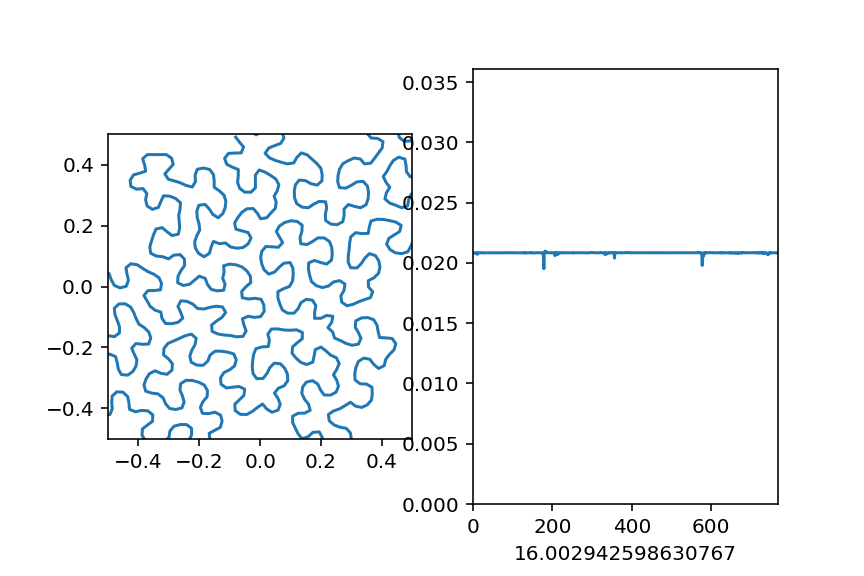

In [6]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(121)
#ax.axis(np.array([-0.28,-0.26,0.26,0.28]))
#ax.axis(np.array([0.21,0.24,-0.44,-0.42]))
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points_new.coords[:,0],points_new.coords[:,1])#,marker='*',markersize=2)
ax.add_line(line)
bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,1/np.sqrt(m)]))
bx.set_xlabel(np.sum(energy._eval_lengths(points_new.coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points_new.coords))
bx.add_line(distance)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    distance.set_ydata(energy._eval_lengths(p.coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.coords)))
    fig.canvas.draw()
    return


In [14]:
#energy._alpha =.00000010
energy._L =np.sqrt(m/3)#15#3.030#
energy._alpha = 10000/energy._L**5#2**(-5/2*9)/10
method= lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
#points_new.coords[:] = points.coords[:]
for i in range(1):
    points_new = method.run(energy,points_new)

Initial value: f[0] = 0.0007511671505996688
f[1] = 0.0007510683237171607
f[2] = 0.0007510309117332957
f[3] = 0.0007509972992661189
f[4] = 0.0007509557184754765
f[5] = 0.0007508545766521271
f[6] = 0.0007506560710690119
f[7] = 0.0007505292768751979
f[8] = 0.0007503231271938978
f[9] = 0.0007501221387964433
f[10] = 0.0007499078013736154
f[11] = 0.0007497662594298502
f[12] = 0.0007496548373775505
f[13] = 0.0007495558966460552
f[14] = 0.0007494527343246407
f[15] = 0.0007493247978655782
f[16] = 0.0007491433845553292
f[17] = 0.0007489165972152744
f[18] = 0.0007486476464222177
f[19] = 0.0007482293252649208
f[20] = 0.0007479855618050418
f[21] = 0.0007477228530927263
f[22] = 0.0007475083548611468
f[23] = 0.000747319751075594
f[24] = 0.0007471436980492025
f[25] = 0.0007469549829510545
f[26] = 0.0007468523709812637
f[27] = 0.0007467398172870197
f[28] = 0.0007466452621277227
f[29] = 0.0007465702312105949
f[30] = 0.0007465150822646725
f[31] = 0.0007464699120995615
f[32] = 0.0007464289559920855
f[33] 

In [68]:
np.sum((m*energy._eval_lengths(points_new.coords)-energy._L)<0)

93

In [107]:
np.sum(energy._eval_lengths(points_new.coords))

31.98708263237529

In [117]:
"tiger_{}.txt".format(1)

'tiger_1.txt'

In [129]:
#points_new.coords = temp
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp